In [1]:
import sys
sys.path.append("../scripts/")
from kf import *

In [3]:
class GlobalKf(KalmanFilter):
    def __init__(self, envmap, motion_noise_stds={"nn":0.19, "no": 0.001, "on":0.13, "oo": 0.2},
                distance_dev_rate=0.14, direction_dev=0.05):
        super().__init__(envmap, np.array([0, 0, 0]).T, motion_noise_stds, distance_dev_rate, direction_dev)
        self.belief.cov = np.diag([1e+4, 1e+4, 1e+4])

In [7]:
def trial(animation):
    time_interval = 0.1
    world = World(30, time_interval, debug=not animation)
    
    m = Map()
    for ln in [(-4, 2), (2, -3), (3, 3)]:
        m.append_landmark(Landmark(*ln))
    world.append(m)
    
    init_pose = np.array([np.random.uniform(-5.0, 5.0), np.random.uniform(5.0, -5.0), np.random.uniform(-math.pi, math.pi)]).T
    kf = GlobalKf(m)
    a = EstimationAgent(time_interval, 0.2, 10.0/180*math.pi, kf)
    r = Robot(init_pose, sensor=Camera(m), agent=a, color="red")
    world.append(r)
    
    world.draw()
    
    return (r.pose, kf.pose)

<IPython.core.display.Javascript object>


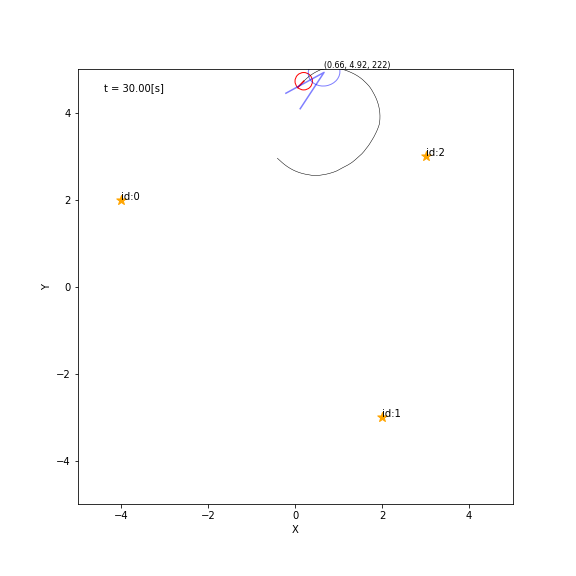

(array([-0.40948682,  2.94994276, -0.75770998]), array([0., 0., 0.]))

In [10]:
trial(True)